<a href="https://colab.research.google.com/github/arushijha03/reelMetrics/blob/main/ML_Project_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

df = pd.read_csv("/content/Labeled_Cleaned_Movies_Data_1995_2024.csv")
df.head()

,TITLE,YEAR,DURATION,MPA,RATING,VOTES,BUDGET,GROSSWORLDWIDE,DIRECTORS,WRITERS,STARS,GENRES,COUNTRIES_ORIGIN,FILMING_LOCATIONS,PRODUCTION_COMPANIES,LANGUAGES,NOMINATIONS,OSCARS,MOVIE_CATEGORY
0,Barbie,2023,114.0,PG-13,6.8,585000.0,100000000.0,1.446938e+09,['Greta Gerwig'],"['Greta Gerwig', 'Noah Baumbach']","['Issa Rae', 'Margot Robbie', 'Ryan Gosling']","['Adventure', 'Comedy', 'Fantasy', 'High-Conce...","['United Kingdom', 'United States']","['Venice Beach, Venice, Los Angeles, Californi...","['Heyday Films', 'LuckyChap', 'Warner Bros.']","['English', 'Spanish']",433,0,Successful
1,The Super Mario Bros. Movie,2023,92.0,PG,7.0,257000.0,100000000.0,1.360848e+09,"['Aaron Horvath', 'Michael Jelenic', 'Pierre L...",['Matthew Fogel'],"['Anya Taylor-Joy', 'Charlie Day', 'Chris Pratt']","['Adventure', 'Adventure Epic', 'Animation', '...","['Japan', 'United States']","['Paris, France']","['Illumination Entertainment', 'Nintendo', 'Un...",['English'],48,0,Successful
2,Spider-Man: Across the Spider-Verse,2023,140.0,PG,8.5,428000.0,150000000.0,6.908247e+08,"['Joaquim Dos Santos', 'Justin K. Thompson', '...","['Christopher Miller', 'Dave Callaham', 'Phil ...","['Brian Tyree Henry', 'Hailee Steinfeld', 'Sha...","['Action', 'Adventure', 'Animation', 'Computer...",['United States'],[],"['Avi Arad Productions', 'Columbia Pictures', ...",['English'],164,1,Successful
3,Guardians of the Galaxy Vol. 3,2023,150.0,PG-13,7.9,411000.0,250000000.0,8.455558e+08,['James Gunn'],"['James Gunn', 'Jim Starlin', 'Stan Lee']","['Bradley Cooper', 'Chris Pratt', 'Chukwudi Iw...","['Action', 'Adventure', 'Comedy', 'Sci-Fi', 'S...","['Canada', 'France', 'New Zealand', 'United St...","['Atlanta, Georgia, USA']","['Film New Zealand', 'Marvel Entertainment', '...","['English', 'Russian']",88,1,Successful
4,Oppenheimer,2023,180.0,R,8.3,834000.0,100000000.0,9.755950e+08,['Christopher Nolan'],"['Christopher Nolan', 'Kai Bird', 'Martin Sher...","['Cillian Murphy', 'Emily Blunt', 'Matt Damon']","['Biography', 'Docudrama', 'Drama', 'Epic', 'H...","['United Kingdom', 'United States']","['Los Alamos, New Mexico, USA']","['Atlas Entertainment', 'Gadget Films', 'Unive...","['Dutch', 'English', 'German', 'Italian']",369,0,Successful


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15850 entries, 0 to 15849
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TITLE                 15850 non-null  object 
 1   YEAR                  15850 non-null  int64  
 2   DURATION              15850 non-null  float64
 3   MPA                   15850 non-null  object 
 4   RATING                15850 non-null  float64
 5   VOTES                 15850 non-null  float64
 6   BUDGET                15850 non-null  float64
 7   GROSSWORLDWIDE        15850 non-null  float64
 8   DIRECTORS             15850 non-null  object 
 9   WRITERS               15850 non-null  object 
 10  STARS                 15850 non-null  object 
 11  GENRES                15850 non-null  object 
 12  COUNTRIES_ORIGIN      15850 non-null  object 
 13  FILMING_LOCATIONS     15850 non-null  object 
 14  PRODUCTION_COMPANIES  15850 non-null  object 
 15  LANGUAGES          

## Naive Bayes

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer, OrdinalEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd

features = ['DURATION', 'RATING', 'VOTES', 'BUDGET', 'GROSSWORLDWIDE', 'NOMINATIONS', 'OSCARS']
categorical_features = ['MPA', 'GENRES', 'LANGUAGES', 'COUNTRIES_ORIGIN']
target = 'MOVIE_CATEGORY'

le = LabelEncoder()
df[target] = le.fit_transform(df[target])

cleaned_df = df[features + [target]]
print("Cleaned Dataset for Naive Bayes:\n")
display(cleaned_df.head())

X = cleaned_df[features]
y = cleaned_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nGaussianNB - Dataset After (Train Set):")
display(X_train.head())
print("\nGaussianNB - Dataset After (Test Set):")
display(X_test.head())

model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
preds_gnb = model_gnb.predict(X_test)

print("\nMultinomialNB - Dataset Before (Train Set):")
display(X_train.head())
print("\nMultinomialNB - Dataset Before (Test Set):")
display(X_test.head())

discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_train_mnb = discretizer.fit_transform(X_train)
X_test_mnb = discretizer.transform(X_test)

print("MultinomialNB - Dataset After (Train Set):")
display(pd.DataFrame(X_train_mnb, columns=features).head())
print("MultinomialNB - Dataset After (Test Set):")
display(pd.DataFrame(X_test_mnb, columns=features).head())

model_mnb = MultinomialNB()
model_mnb.fit(X_train_mnb, y_train)
preds_mnb = model_mnb.predict(X_test_mnb)

print("\nCategoricalNB - Dataset Before (Train Set):")
cat_features = features + categorical_features
cat_df = df[cat_features + [target]].copy()

cat_df[categorical_features] = cat_df[categorical_features].astype(str)
X_cat = cat_df[cat_features]
y_cat = cat_df[target]
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.2, random_state=42)
display(X_train_cat.head())
print("\nCategoricalNB - Dataset Before (Test Set):")
display(X_test_cat.head())

max_value = int(pd.to_numeric(df[features].stack(), errors='coerce').max()) + 1000
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=max_value)
X_train_cnb = encoder.fit_transform(X_train_cat)
X_test_cnb = encoder.transform(X_test_cat)

X_test_cnb_clipped = X_test_cnb.copy()
for col_idx in range(X_test_cnb.shape[1]):
    max_allowed = int(X_train_cnb[:, col_idx].max())
    X_test_cnb_clipped[:, col_idx] = np.clip(X_test_cnb[:, col_idx], a_min=0, a_max=max_allowed)

print("CategoricalNB - Dataset After (Train Set):")
display(pd.DataFrame(X_train_cnb, columns=cat_features).head())
print("CategoricalNB - Dataset After (Test Set):")
display(pd.DataFrame(X_test_cnb_clipped, columns=cat_features).head())

model_cnb = CategoricalNB()
model_cnb.fit(X_train_cnb, y_train_cat)
preds_cnb = model_cnb.predict(X_test_cnb_clipped)

models = {
    "GaussianNB": preds_gnb,
    "MultinomialNB": preds_mnb,
    "CategoricalNB": preds_cnb
}

for name, preds in models.items():
    print(f"\n====== {name} ======")
    print(f"Accuracy: {accuracy_score(y_test, preds):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds, zero_division=0))


Cleaned Dataset for Naive Bayes:



,DURATION,RATING,VOTES,BUDGET,GROSSWORLDWIDE,NOMINATIONS,OSCARS,MOVIE_CATEGORY
0,114.0,6.8,585000.0,100000000.0,1.446938e+09,433,0,2
1,92.0,7.0,257000.0,100000000.0,1.360848e+09,48,0,2
2,140.0,8.5,428000.0,150000000.0,6.908247e+08,164,1,2
3,150.0,7.9,411000.0,250000000.0,8.455558e+08,88,1,2
4,180.0,8.3,834000.0,100000000.0,9.755950e+08,369,0,2



GaussianNB - Dataset After (Train Set):


,DURATION,RATING,VOTES,BUDGET,GROSSWORLDWIDE,NOMINATIONS,OSCARS
2333,88.0,6.8,10000.0,-1.0,546459.0,11,0
14314,130.0,7.9,802000.0,40000000.0,312897920.0,116,1
875,74.0,7.0,3400.0,-1.0,164540.0,0,0
7615,118.0,7.4,13000.0,-1.0,5382886.0,13,0
2945,112.0,6.6,430.0,-1.0,135191.0,0,0



GaussianNB - Dataset After (Test Set):


,DURATION,RATING,VOTES,BUDGET,GROSSWORLDWIDE,NOMINATIONS,OSCARS
9488,109.0,5.2,14000.0,-1.0,21054050.0,0,0
5514,90.0,7.2,8400.0,25000.0,1294176.0,0,0
7303,86.0,6.5,224000.0,75000000.0,875698161.0,15,0
1662,99.0,5.8,13000.0,-1.0,13603453.0,4,0
13627,109.0,4.6,399.0,-1.0,11560.0,0,0



MultinomialNB - Dataset Before (Train Set):


,DURATION,RATING,VOTES,BUDGET,GROSSWORLDWIDE,NOMINATIONS,OSCARS
2333,88.0,6.8,10000.0,-1.0,546459.0,11,0
14314,130.0,7.9,802000.0,40000000.0,312897920.0,116,1
875,74.0,7.0,3400.0,-1.0,164540.0,0,0
7615,118.0,7.4,13000.0,-1.0,5382886.0,13,0
2945,112.0,6.6,430.0,-1.0,135191.0,0,0



MultinomialNB - Dataset Before (Test Set):


,DURATION,RATING,VOTES,BUDGET,GROSSWORLDWIDE,NOMINATIONS,OSCARS
9488,109.0,5.2,14000.0,-1.0,21054050.0,0,0
5514,90.0,7.2,8400.0,25000.0,1294176.0,0,0
7303,86.0,6.5,224000.0,75000000.0,875698161.0,15,0
1662,99.0,5.8,13000.0,-1.0,13603453.0,4,0
13627,109.0,4.6,399.0,-1.0,11560.0,0,0


MultinomialNB - Dataset After (Train Set):


,DURATION,RATING,VOTES,BUDGET,GROSSWORLDWIDE,NOMINATIONS,OSCARS
0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
1,3.0,8.0,2.0,0.0,1.0,2.0,1.0
2,1.0,7.0,0.0,0.0,0.0,0.0,0.0
3,2.0,7.0,0.0,0.0,0.0,0.0,0.0
4,2.0,7.0,0.0,0.0,0.0,0.0,0.0


MultinomialNB - Dataset After (Test Set):


,DURATION,RATING,VOTES,BUDGET,GROSSWORLDWIDE,NOMINATIONS,OSCARS
0,2.0,5.0,0.0,0.0,0.0,0.0,0.0
1,2.0,7.0,0.0,0.0,0.0,0.0,0.0
2,2.0,7.0,0.0,0.0,2.0,0.0,0.0
3,2.0,6.0,0.0,0.0,0.0,0.0,0.0
4,2.0,5.0,0.0,0.0,0.0,0.0,0.0



CategoricalNB - Dataset Before (Train Set):


,DURATION,RATING,VOTES,BUDGET,GROSSWORLDWIDE,NOMINATIONS,OSCARS,MPA,GENRES,LANGUAGES,COUNTRIES_ORIGIN
2333,88.0,6.8,10000.0,-1.0,546459.0,11,0,Not Rated,"['Comedy', 'Dark Comedy', 'Drama', 'Romance']","['English', 'Icelandic', 'Spanish']","['Denmark', 'France', 'Germany', 'Iceland', 'N..."
14314,130.0,7.9,802000.0,40000000.0,312897920.0,116,1,PG-13,"['Comedy', 'Cozy Mystery', 'Crime', 'Drama', '...",['English'],['United States']
875,74.0,7.0,3400.0,-1.0,164540.0,0,0,TV-14,"['Biography', 'Documentary', 'History', 'Music']",['English'],['United States']
7615,118.0,7.4,13000.0,-1.0,5382886.0,13,0,Not Rated,"['Comedy', 'Drama']",['Japanese'],['Japan']
2945,112.0,6.6,430.0,-1.0,135191.0,0,0,Not Rated,['Drama'],['Hebrew'],['Israel']



CategoricalNB - Dataset Before (Test Set):


,DURATION,RATING,VOTES,BUDGET,GROSSWORLDWIDE,NOMINATIONS,OSCARS,MPA,GENRES,LANGUAGES,COUNTRIES_ORIGIN
9488,109.0,5.2,14000.0,-1.0,21054050.0,0,0,Not Rated,"['Comedy', 'Documentary', 'Drama', 'Faith & Sp...","['English', 'German', 'Spanish']",['United States']
5514,90.0,7.2,8400.0,25000.0,1294176.0,0,0,Not Rated,"['Comedy', 'Romance']",['English'],['United States']
7303,86.0,6.5,224000.0,75000000.0,875698161.0,15,0,PG,"['Adventure', 'Animal Adventure', 'Animation',...",['English'],"['Japan', 'United States']"
1662,99.0,5.8,13000.0,-1.0,13603453.0,4,0,PG,"['Adventure', 'Animation', 'Comedy', 'Computer...",['English'],"['Poland', 'Singapore', 'Thailand', 'United St..."
13627,109.0,4.6,399.0,-1.0,11560.0,0,0,Not Rated,"['Drama', 'Thriller']",['English'],['United States']


CategoricalNB - Dataset After (Train Set):


,DURATION,RATING,VOTES,BUDGET,GROSSWORLDWIDE,NOMINATIONS,OSCARS,MPA,GENRES,LANGUAGES,COUNTRIES_ORIGIN
0,43.0,59.0,996.0,0.0,4197.0,10.0,0.0,8.0,2699.0,829.0,759.0
1,85.0,70.0,1539.0,494.0,10997.0,112.0,1.0,10.0,2542.0,1043.0,1475.0
2,29.0,61.0,930.0,0.0,2882.0,0.0,0.0,12.0,2262.0,1043.0,1475.0
3,73.0,65.0,999.0,0.0,6702.0,12.0,0.0,8.0,2981.0,1191.0,1325.0
4,67.0,57.0,410.0,0.0,2674.0,0.0,0.0,8.0,4178.0,1152.0,1281.0


CategoricalNB - Dataset After (Test Set):


,DURATION,RATING,VOTES,BUDGET,GROSSWORLDWIDE,NOMINATIONS,OSCARS,MPA,GENRES,LANGUAGES,COUNTRIES_ORIGIN
0,64.0,43.0,1000.0,0.0,11397.0,0.0,0.0,8.0,4396.0,756.0,1475.0
1,45.0,63.0,980.0,32.0,11397.0,0.0,0.0,8.0,3209.0,1043.0,1475.0
2,41.0,56.0,1210.0,552.0,11397.0,14.0,0.0,9.0,4396.0,1043.0,1324.0
3,54.0,49.0,999.0,0.0,11397.0,3.0,0.0,9.0,4396.0,1043.0,1479.0
4,64.0,37.0,383.0,0.0,11397.0,0.0,0.0,8.0,4170.0,1043.0,1475.0



====== GaussianNB ======
Accuracy: 0.7170
Confusion Matrix:
 [[2000   82    5]
 [ 108  111   34]
 [ 449  219  162]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.96      0.86      2087
           1       0.27      0.44      0.33       253
           2       0.81      0.20      0.31       830

    accuracy                           0.72      3170
   macro avg       0.62      0.53      0.50      3170
weighted avg       0.75      0.72      0.68      3170


====== MultinomialNB ======
Accuracy: 0.7533
Confusion Matrix:
 [[2062    0   25]
 [ 226    0   27]
 [ 504    0  326]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.99      0.85      2087
           1       0.00      0.00      0.00       253
           2       0.86      0.39      0.54       830

    accuracy                           0.75      3170
   macro avg       0.53      0.46      0.46      3170
weighted

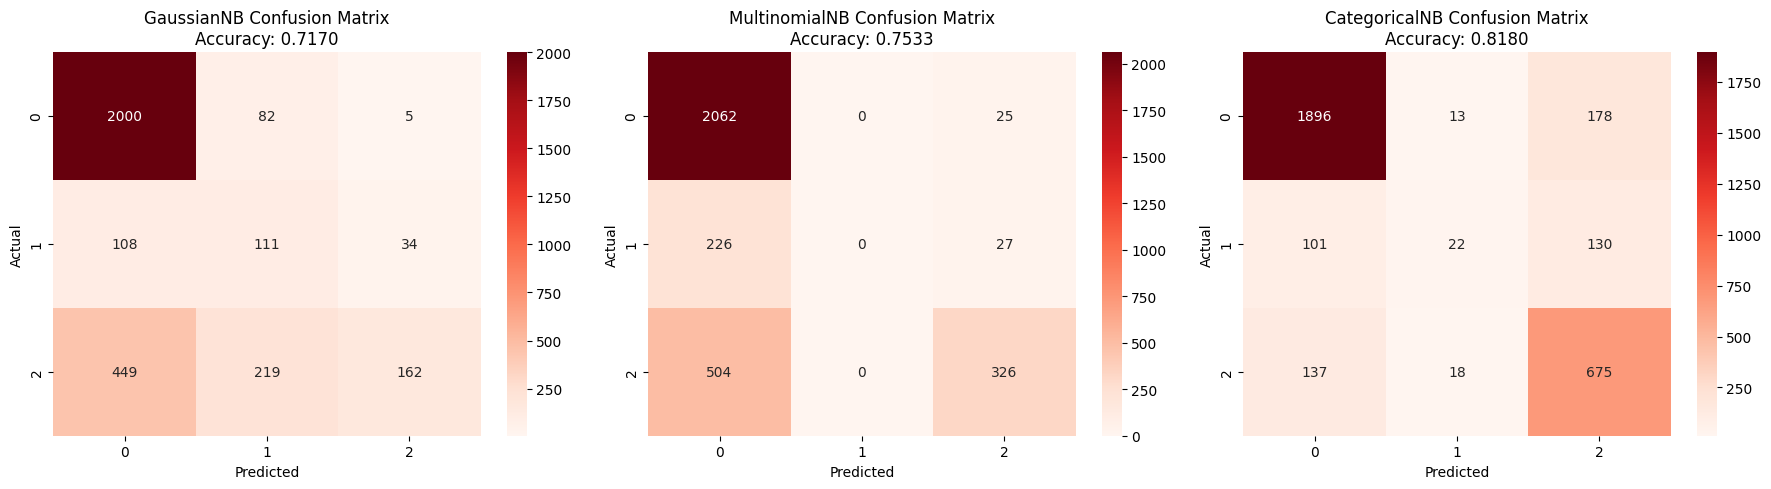

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

model_results = {
    "GaussianNB": {
        "accuracy": accuracy_score(y_test, preds_gnb),
        "conf_matrix": confusion_matrix(y_test, preds_gnb)
    },
    "MultinomialNB": {
        "accuracy": accuracy_score(y_test, preds_mnb),
        "conf_matrix": confusion_matrix(y_test, preds_mnb)
    },
    "CategoricalNB": {
        "accuracy": accuracy_score(y_test, preds_cnb),
        "conf_matrix": confusion_matrix(y_test, preds_cnb)
    }
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (model_name, result) in zip(axes, model_results.items()):
    sns.heatmap(result["conf_matrix"], annot=True, fmt='d', cmap='Reds', ax=ax)
    ax.set_title(f"{model_name} Confusion Matrix\nAccuracy: {result['accuracy']:.4f}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

## Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

X = cleaned_df[features]
y = cleaned_df[target]

print("Cleaned Dataset Used for Decision Tree:")
display(cleaned_df[features + [target]].head())

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Sample:")
display(X_train_dt.head())

print("\nTesting Set Sample:")
display(X_test_dt.head())

Cleaned Dataset Used for Decision Tree:


,DURATION,RATING,VOTES,BUDGET,GROSSWORLDWIDE,NOMINATIONS,OSCARS,MOVIE_CATEGORY
0,114.0,6.8,585000.0,100000000.0,1.446938e+09,433,0,2
1,92.0,7.0,257000.0,100000000.0,1.360848e+09,48,0,2
2,140.0,8.5,428000.0,150000000.0,6.908247e+08,164,1,2
3,150.0,7.9,411000.0,250000000.0,8.455558e+08,88,1,2
4,180.0,8.3,834000.0,100000000.0,9.755950e+08,369,0,2


Training Set Sample:


,DURATION,RATING,VOTES,BUDGET,GROSSWORLDWIDE,NOMINATIONS,OSCARS
2333,88.0,6.8,10000.0,-1.0,546459.0,11,0
14314,130.0,7.9,802000.0,40000000.0,312897920.0,116,1
875,74.0,7.0,3400.0,-1.0,164540.0,0,0
7615,118.0,7.4,13000.0,-1.0,5382886.0,13,0
2945,112.0,6.6,430.0,-1.0,135191.0,0,0



Testing Set Sample:


,DURATION,RATING,VOTES,BUDGET,GROSSWORLDWIDE,NOMINATIONS,OSCARS
9488,109.0,5.2,14000.0,-1.0,21054050.0,0,0
5514,90.0,7.2,8400.0,25000.0,1294176.0,0,0
7303,86.0,6.5,224000.0,75000000.0,875698161.0,15,0
1662,99.0,5.8,13000.0,-1.0,13603453.0,4,0
13627,109.0,4.6,399.0,-1.0,11560.0,0,0


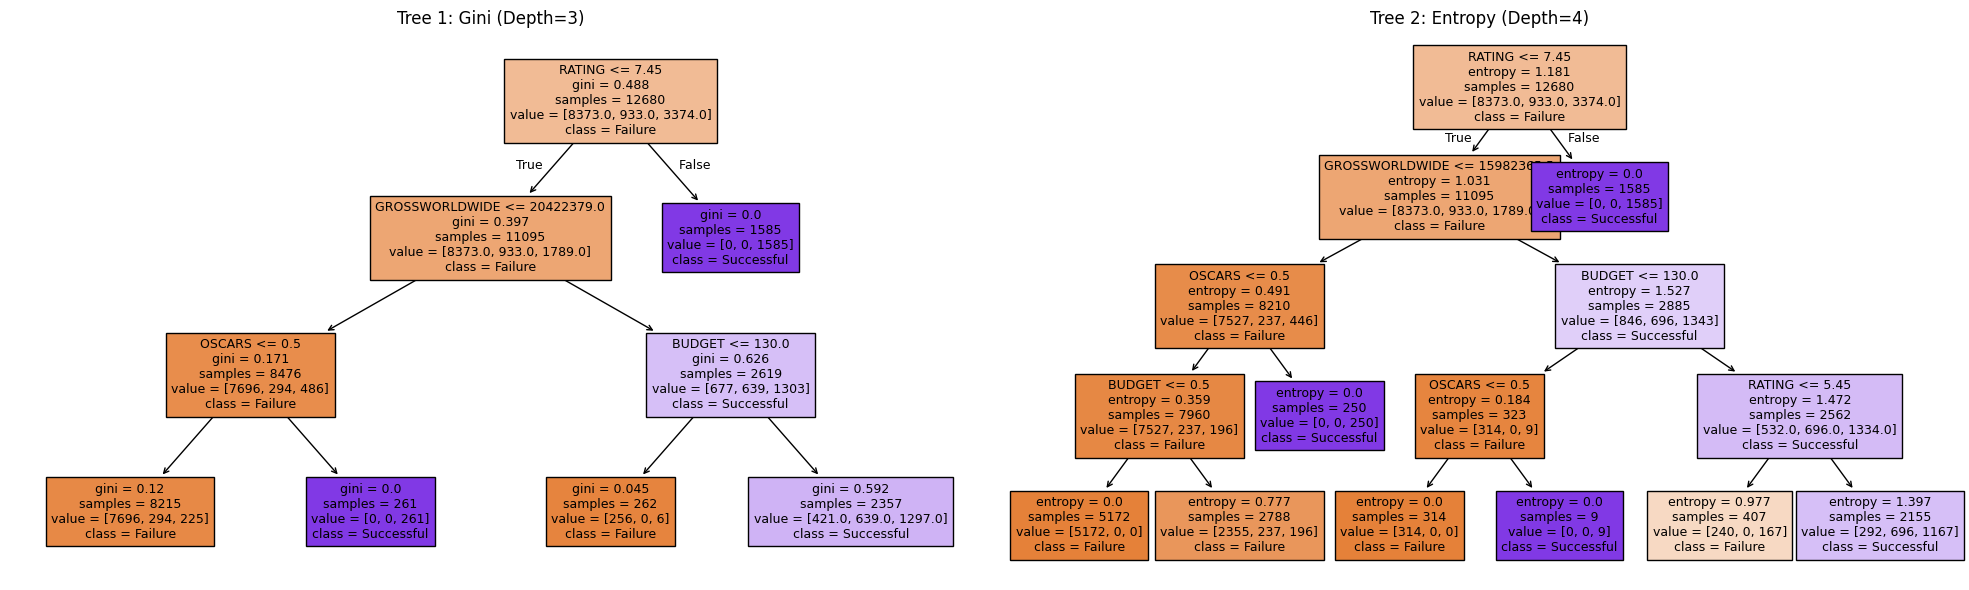

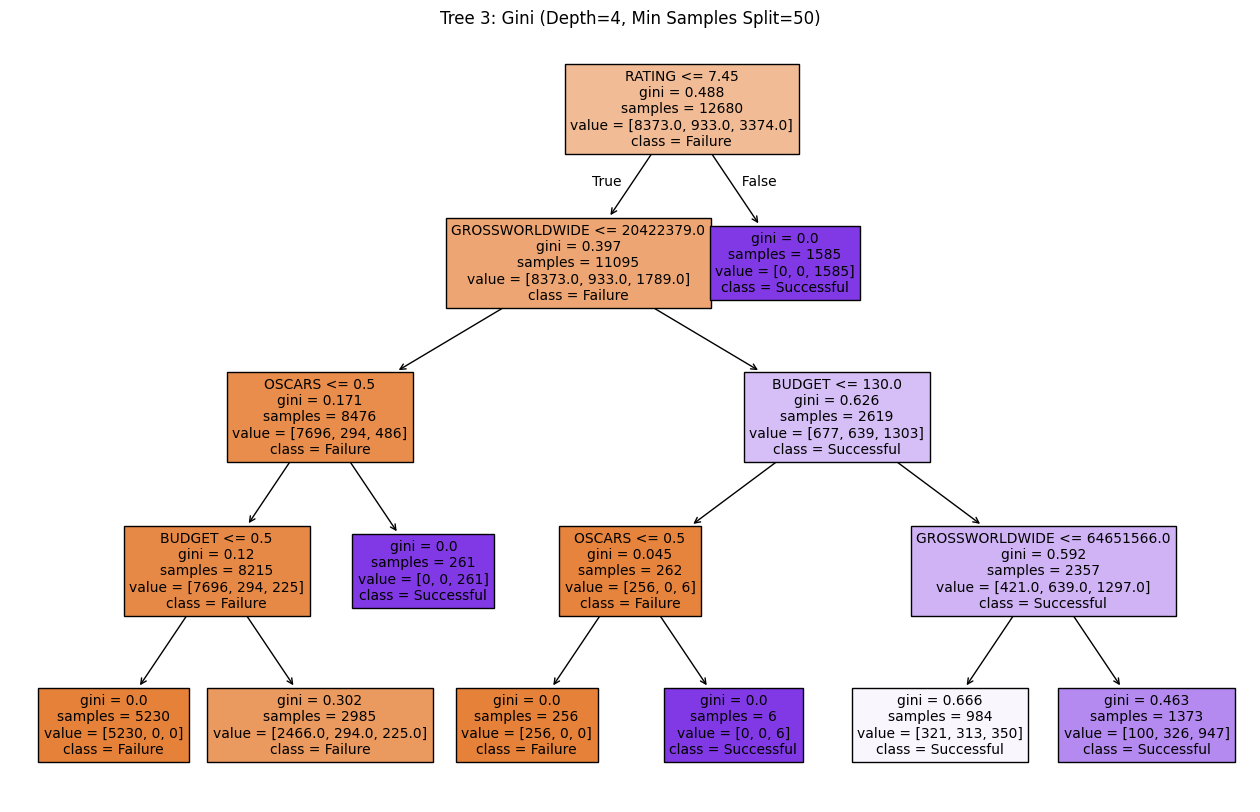

In [15]:
tree_1 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree_2 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
tree_3 = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=50,random_state=42)

tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)
tree_3.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

plot_tree(tree_1, feature_names=features, class_names=[str(cls) for cls in le.classes_],
          filled=True, ax=axes[0], fontsize=9)
axes[0].set_title("Tree 1: Gini (Depth=3)")

plot_tree(tree_2, feature_names=features, class_names=[str(cls) for cls in le.classes_],
          filled=True, ax=axes[1], fontsize=9)
axes[1].set_title("Tree 2: Entropy (Depth=4)")

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 10))
plot_tree(tree_3,
          feature_names=features,
          class_names=[str(cls) for cls in le.classes_],
          filled=True,
          fontsize=10)
plt.title("Tree 3: Gini (Depth=4, Min Samples Split=50)")
plt.show()


Tree 1: Gini (Depth=3)
Accuracy: 0.8625

Confusion Matrix:
[[1967    0  120]
 [  72    0  181]
 [  63    0  767]]

Classification Report:
              precision    recall  f1-score   support

     Failure       0.94      0.94      0.94      2087
    Mediocre       0.00      0.00      0.00       253
  Successful       0.72      0.92      0.81       830

    accuracy                           0.86      3170
   macro avg       0.55      0.62      0.58      3170
weighted avg       0.80      0.86      0.83      3170



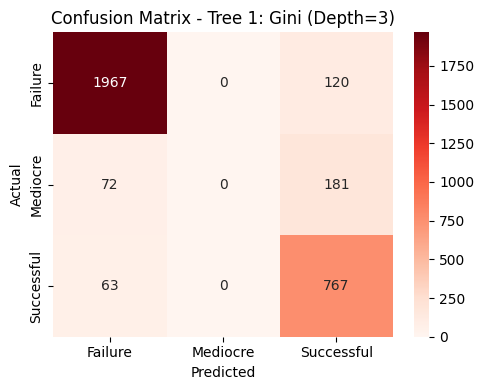


Tree 2: Entropy (Depth=4)
Accuracy: 0.8703

Confusion Matrix:
[[2016    0   71]
 [  58    0  195]
 [  87    0  743]]

Classification Report:
              precision    recall  f1-score   support

     Failure       0.93      0.97      0.95      2087
    Mediocre       0.00      0.00      0.00       253
  Successful       0.74      0.90      0.81       830

    accuracy                           0.87      3170
   macro avg       0.56      0.62      0.59      3170
weighted avg       0.81      0.87      0.84      3170



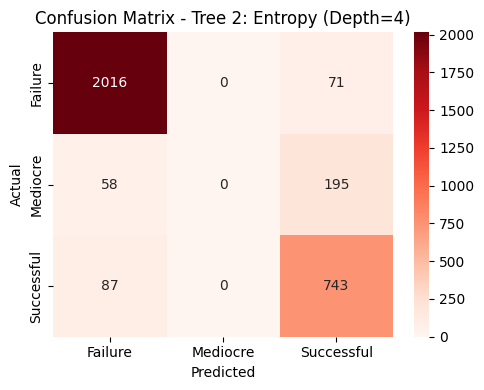


Tree 3: Gini (Depth=4, MinSamples=50)
Accuracy: 0.8634

Confusion Matrix:
[[1967    0  120]
 [  72    0  181]
 [  60    0  770]]

Classification Report:
              precision    recall  f1-score   support

     Failure       0.94      0.94      0.94      2087
    Mediocre       0.00      0.00      0.00       253
  Successful       0.72      0.93      0.81       830

    accuracy                           0.86      3170
   macro avg       0.55      0.62      0.58      3170
weighted avg       0.81      0.86      0.83      3170



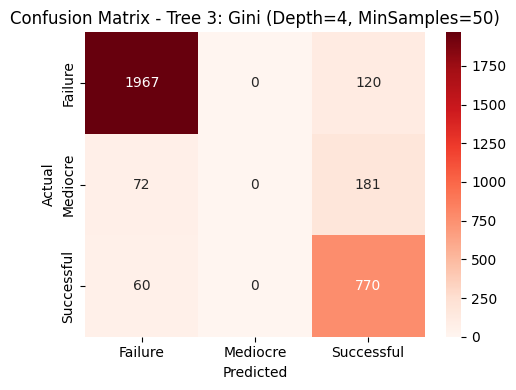

In [16]:
tree_models = {
    "Tree 1: Gini (Depth=3)": tree_1,
    "Tree 2: Entropy (Depth=4)": tree_2,
    "Tree 3: Gini (Depth=4, MinSamples=50)": tree_3
}

for name, model in tree_models.items():
    print(f"\n{name}")
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0)

    print(f"Accuracy: {acc:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(report)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

## Logistic Regression

Cleaned Dataset Used for Logistic Regression and Naive Bayes:


,DURATION,RATING,VOTES,BUDGET,GROSSWORLDWIDE,NOMINATIONS,OSCARS,MOVIE_CATEGORY
0,114.0,6.8,585000.0,100000000.0,1.446938e+09,433,0,Successful
1,92.0,7.0,257000.0,100000000.0,1.360848e+09,48,0,Successful
2,140.0,8.5,428000.0,150000000.0,6.908247e+08,164,1,Successful
3,150.0,7.9,411000.0,250000000.0,8.455558e+08,88,1,Successful
4,180.0,8.3,834000.0,100000000.0,9.755950e+08,369,0,Successful


(14664, 19)
Training Set Sample (for Logistic Regression):


,DURATION,RATING,VOTES,BUDGET,GROSSWORLDWIDE,NOMINATIONS,OSCARS,MOVIE_CATEGORY
0,-0.398425,0.173088,0.675724,-0.015794,0.358159,-0.364543,-0.21311,Successful
1,-0.579014,0.688540,-0.338830,-0.023214,-0.282795,-0.364543,-0.21311,Failure
2,-0.624161,-0.256454,-0.338652,-0.023214,-0.286443,-0.364543,-0.21311,Failure
3,1.588053,1.633534,-0.000978,0.172068,-0.264106,0.777329,-0.21311,Successful
4,-0.533867,0.258997,-0.339592,-0.023214,-0.283812,-0.128293,-0.21311,Failure



Test Set Sample (for Logistic Regression):


,DURATION,RATING,VOTES,BUDGET,GROSSWORLDWIDE,NOMINATIONS,OSCARS,MOVIE_CATEGORY
0,-0.127542,-0.428272,-0.334343,-0.022238,-0.286327,-0.364543,-0.21311,Failure
1,0.007900,-1.716900,-0.341915,-0.022433,-0.286594,-0.088918,-0.21311,Failure
2,-0.533867,-0.514180,-0.311549,-0.023214,-0.282500,-0.364543,-0.21311,Failure
3,-0.804750,-0.857814,-0.164811,-0.011497,0.150655,-0.364543,-0.21311,Failure
4,0.098195,-0.685997,-0.036594,-0.011497,-0.216031,-0.364543,-0.21311,Failure



Logistic Regression Results
Accuracy: 0.9069
Confusion Matrix:
[[2065   42]
 [ 231  595]]
Classification Report:
              precision    recall  f1-score   support

     Failure       0.90      0.98      0.94      2107
  Successful       0.93      0.72      0.81       826

    accuracy                           0.91      2933
   macro avg       0.92      0.85      0.88      2933
weighted avg       0.91      0.91      0.90      2933



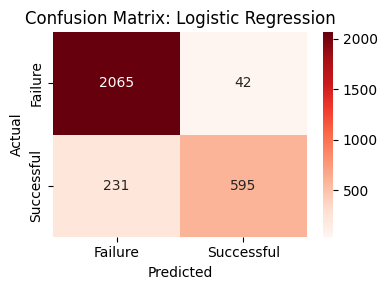


Multinomial Naive Bayes Results
Accuracy: 0.8278
Confusion Matrix:
[[2087   20]
 [ 485  341]]
Classification Report:
              precision    recall  f1-score   support

     Failure       0.81      0.99      0.89      2107
  Successful       0.94      0.41      0.57       826

    accuracy                           0.83      2933
   macro avg       0.88      0.70      0.73      2933
weighted avg       0.85      0.83      0.80      2933



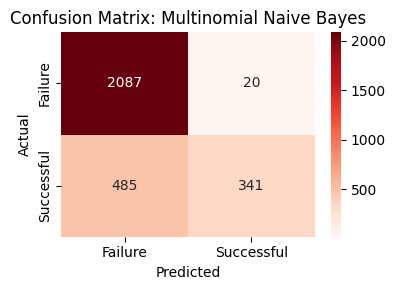

<ipython-input-17-2b9dfc39b1c6>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')


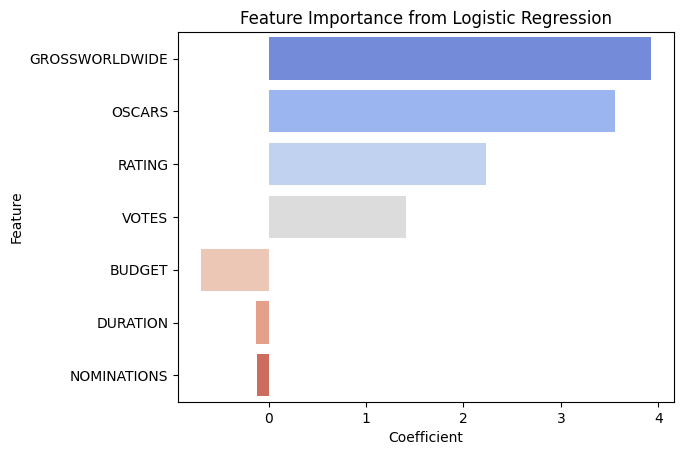

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

df['MOVIE_CATEGORY'] = le.inverse_transform(df['MOVIE_CATEGORY'])

binary_df = df[df['MOVIE_CATEGORY'].isin(['Failure', 'Successful'])].copy()

features = ['DURATION', 'RATING', 'VOTES', 'BUDGET', 'GROSSWORLDWIDE', 'NOMINATIONS', 'OSCARS']
X_raw = binary_df[features]
y = binary_df['MOVIE_CATEGORY']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

print("Cleaned Dataset Used for Logistic Regression and Naive Bayes:")
display(binary_df[features + ['MOVIE_CATEGORY']].head())
print(binary_df.shape)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
X_train_raw, X_test_raw, _, _ = train_test_split(X_raw, y_encoded, test_size=0.2, random_state=42)

print("Training Set Sample (for Logistic Regression):")
train_sample = pd.DataFrame(X_train_scaled, columns=features)
train_sample['MOVIE_CATEGORY'] = label_encoder.inverse_transform(y_train)
display(train_sample.head())

print("\nTest Set Sample (for Logistic Regression):")
test_sample = pd.DataFrame(X_test_scaled, columns=features)
test_sample['MOVIE_CATEGORY'] = label_encoder.inverse_transform(y_test)
display(test_sample.head())

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
log_preds = log_reg.predict(X_test_scaled)

discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform', random_state=42)
X_train_nb = discretizer.fit_transform(X_train_raw)
X_test_nb = discretizer.transform(X_test_raw)

nb_model = MultinomialNB()
nb_model.fit(X_train_nb, y_train)
nb_preds = nb_model.predict(X_test_nb)

results = {}

for name, y_pred in zip(['Logistic Regression', 'Multinomial Naive Bayes'], [log_preds, nb_preds]):
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0)

    results[name] = {'accuracy': acc, 'confusion_matrix': cm, 'classification_report': cr}

    print(f"\n{name} Results")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(cr)

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Feature Importance from Logistic Regression')
plt.show()